In [74]:
import tensorflow as tf 
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os 

In [75]:
def canny_segmentation(image):
    # detect edge using canny
    edged = cv2.Canny(image,100, 200)
    edged = edged.astype(np.float32)
    return edged

def k_means_segmentation(image): 
    image_reshape = image.reshape((-1,1 )).astype(np.float32)
    # set to 6 cluster 
    K = 7
    attempts=10
    # criteria for k means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret,label,center=cv2.kmeans(image_reshape,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    result_image = res.reshape((image.shape))
    return result_image

def thresholding_segmentation(image): 
    _,thresh = cv2.threshold(image, np.mean(image), 255, cv2.THRESH_TOZERO)
    return thresh

def otsu_segmentation(image): 
    ret, otsu_result = cv2.threshold(image,120, 255, cv2.THRESH_BINARY +  cv2.THRESH_OTSU)    
    # returnr otsu result
    return otsu_result


def show_segmetation(list_images_segmented): 
    titles = ['canny segmentation', 'k_means segmentation', "thresholding_segmentation", "otsu segmentation"]
    fig = plt.figure(figsize=(10, 10))
    for index, title in enumerate(titles):
        plt.subplot(2, 2, index+1)
        plt.imshow(list_images_segmented[index])  # Menampilkan gambar
        plt.title(title)

def train_segmentation(folder_path, new_image_path): 
    classes = ['glioma_tumor', "meningioma_tumor", "no_tumor", "pituitary_tumor"]
    subsets = ['Training', "Testing"]
    # creating folder after finish doing segmentation
    if os.path.exists(new_image_path) == False: 
        os.mkdir(new_image_path)
        for subset in subsets: 
            new_folder_subset_path = os.path.join(new_image_path, subset)
            os.mkdir(new_folder_subset_path)
            for class_image in classes: 
                new_folder_class_path = os.path.join(new_image_path, subset + "/" + class_image)
                os.mkdir(new_folder_class_path)

    #  if already exists
    for train_test in os.listdir(folder_path):
        for subset in subsets:
            for class_i in classes: 
                full_path = os.path.join(folder_path, subset + '/'+ class_i)
                for image in os.listdir(full_path): 
                    image_read  = cv2.imread(os.path.join(full_path, image), cv2.IMREAD_GRAYSCALE)
                    image_k_means = k_means_segmentation(image_read)
                    # print(os.path.join(new_image_path, subset + "/" + class_i + "/" + image + ".jpg"))
                    cv2.imwrite(os.path.join(new_image_path, subset + "/" + class_i + "/" + image + ".jpg"), image_k_means)



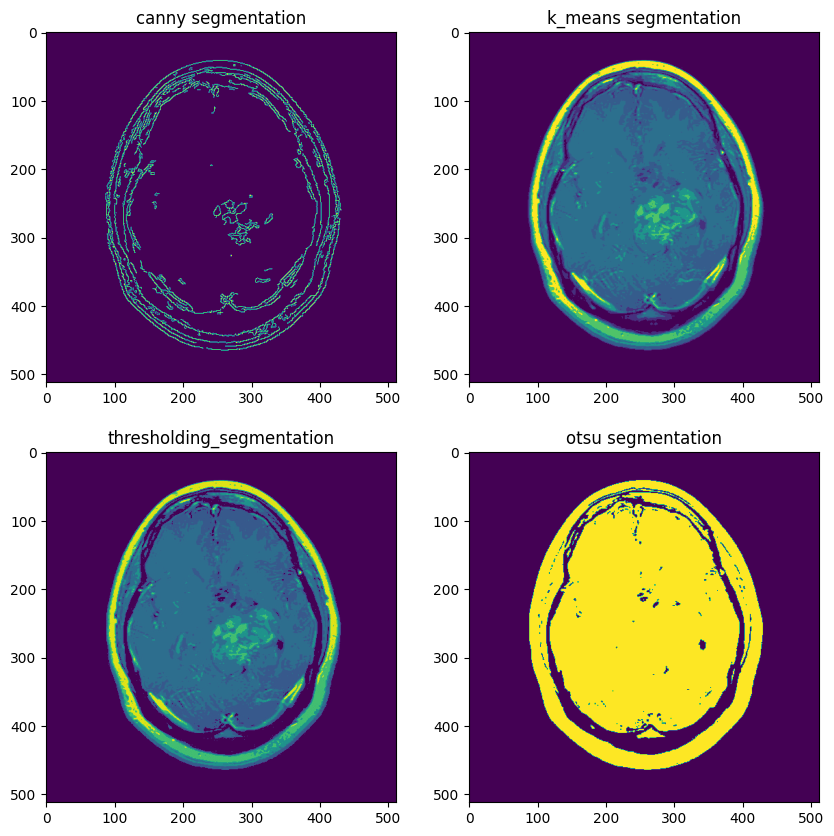

In [76]:

# test image 
read = cv2.imread("./data/Training/glioma_tumor/gg (1).jpg", cv2.IMREAD_GRAYSCALE)
k_mean = k_means_segmentation(read)
canny = canny_segmentation(read)
thresholding = thresholding_segmentation(read)
otsu = otsu_segmentation(read)
show_segmetation([canny, k_mean, thresholding, otsu])

In [77]:
train_segmentation("./data/", "./data/k_means_segmentation/")

KeyboardInterrupt: 